In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models,layers

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/ISIC_2019_Training_GroundTruth.csv')

#!unzip -u '/content/drive/MyDrive/ISIC_2019_Training_Input.zip' -d '/content/Train'
base_dir = '/content/Train/ISIC_2019_Training_Input'

In [ ]:
df_train = df.sample(frac=0.8)
df_val = df[~df['image'].isin(df_train.image.unique())]
print(len(df_train))
print(len(df_val))

20265
5066


In [ ]:
print(len(df_train[df_train['MEL']==1.0]))
print(len(df_train[df_train['NV']==1.0]))
print(len(df_train[df_train['BCC']==1.0]))
print(len(df_train[df_train['AK']==1.0]))
print(len(df_train[df_train['BKL']==1.0]))
print(len(df_train[df_train['DF']==1.0]))
print(len(df_train[df_train['VASC']==1.0]))
print(len(df_train[df_train['SCC']==1.0]))

3626
10247
2661
680
2116
195
216
524


In [ ]:
raiz1 = np.sqrt(len(df_train[df_train['MEL']==1.0]))
raiz2 = np.sqrt(len(df_train[df_train['NV']==1.0]))
raiz3 = np.sqrt(len(df_train[df_train['BCC']==1.0]))
raiz4 = np.sqrt(len(df_train[df_train['AK']==1.0]))
raiz5 = np.sqrt(len(df_train[df_train['BKL']==1.0]))
raiz6 = np.sqrt(len(df_train[df_train['DF']==1.0]))
raiz7 = np.sqrt(len(df_train[df_train['VASC']==1.0]))
raiz8 = np.sqrt(len(df_train[df_train['SCC']==1.0]))

In [ ]:
#newdf_train1 = pd.DataFrame(np.repeat(df_train[df_train['MEL']==1.0].values,3,axis=0))
newdf_train1 = df_train[df_train['MEL']==1].sample(int(raiz1), replace=False, random_state=1)
newdf_train1.columns = df_train.columns

#newdf_train2 = pd.DataFrame(np.repeat(df_train[df_train['NV']==1.0].values,1,axis=0))
newdf_train2 = df_train[df_train['NV']==1].sample(int(raiz2), replace=False, random_state=1)
newdf_train2.columns = df_train.columns

#newdf_train3 = pd.DataFrame(np.repeat(df_train[df_train['BCC']==1.0].values,4,axis=0))
newdf_train3 = df_train[df_train['BCC']==1].sample(int(raiz3), replace=False, random_state=1)
newdf_train3.columns = df_train.columns

#newdf_train4 = pd.DataFrame(np.repeat(df_train[df_train['AK']==1.0].values,15,axis=0))
newdf_train4 = df_train[df_train['AK']==1].sample(int(raiz4), replace=False, random_state=1)
newdf_train4.columns = df_train.columns

#newdf_train5 = pd.DataFrame(np.repeat(df_train[df_train['BKL']==1.0].values,5,axis=0))
newdf_train5 = df_train[df_train['BKL']==1].sample(int(raiz5), replace=False, random_state=1)
newdf_train5.columns = df_train.columns

#newdf_train6 = pd.DataFrame(np.repeat(df_train[df_train['DF']==1.0].values,56,axis=0))
newdf_train6 = df_train[df_train['DF']==1].sample(int(raiz6), replace=False, random_state=1)
newdf_train6.columns = df_train.columns

#newdf_train7 = pd.DataFrame(np.repeat(df_train[df_train['VASC']==1.0].values,52,axis=0))
newdf_train7 = df_train[df_train['VASC']==1].sample(int(raiz7), replace=False, random_state=1)
newdf_train7.columns = df_train.columns

#newdf_train8 = pd.DataFrame(np.repeat(df_train[df_train['SCC']==1.0].values,21,axis=0))
newdf_train8 = df_train[df_train['SCC']==1].sample(int(raiz8), replace=False, random_state=1)
newdf_train8.columns = df_train.columns

In [ ]:
newdf_train1 = tf.data.Dataset.from_tensor_slices((newdf_train1['image'],
                                                    newdf_train1['MEL'],
                                                    newdf_train1['NV'],
                                                    newdf_train1['BCC'],
                                                    newdf_train1['AK'],
                                                    newdf_train1['BKL'],
                                                    newdf_train1['DF'],
                                                    newdf_train1['VASC'],
                                                    newdf_train1['SCC']))
newdf_train2 = tf.data.Dataset.from_tensor_slices((newdf_train2['image'],
                                                    newdf_train2['MEL'],
                                                    newdf_train2['NV'],
                                                    newdf_train2['BCC'],
                                                    newdf_train2['AK'],
                                                    newdf_train2['BKL'],
                                                    newdf_train2['DF'],
                                                    newdf_train2['VASC'],
                                                    newdf_train2['SCC']))
newdf_train3 = tf.data.Dataset.from_tensor_slices((newdf_train3['image'],
                                                    newdf_train3['MEL'],
                                                    newdf_train3['NV'],
                                                    newdf_train3['BCC'],
                                                    newdf_train3['AK'],
                                                    newdf_train3['BKL'],
                                                    newdf_train3['DF'],
                                                    newdf_train3['VASC'],
                                                    newdf_train3['SCC']))
newdf_train4 = tf.data.Dataset.from_tensor_slices((newdf_train4['image'],
                                                    newdf_train4['MEL'],
                                                    newdf_train4['NV'],
                                                    newdf_train4['BCC'],
                                                    newdf_train4['AK'],
                                                    newdf_train4['BKL'],
                                                    newdf_train4['DF'],
                                                    newdf_train4['VASC'],
                                                    newdf_train4['SCC']))
newdf_train5 = tf.data.Dataset.from_tensor_slices((newdf_train5['image'],
                                                    newdf_train5['MEL'],
                                                    newdf_train5['NV'],
                                                    newdf_train5['BCC'],
                                                    newdf_train5['AK'],
                                                    newdf_train5['BKL'],
                                                    newdf_train5['DF'],
                                                    newdf_train5['VASC'],
                                                    newdf_train5['SCC']))
newdf_train6 = tf.data.Dataset.from_tensor_slices((newdf_train6['image'],
                                                    newdf_train6['MEL'],
                                                    newdf_train6['NV'],
                                                    newdf_train6['BCC'],
                                                    newdf_train6['AK'],
                                                    newdf_train6['BKL'],
                                                    newdf_train6['DF'],
                                                    newdf_train6['VASC'],
                                                    newdf_train6['SCC']))
newdf_train7 = tf.data.Dataset.from_tensor_slices((newdf_train7['image'],
                                                    newdf_train7['MEL'],
                                                    newdf_train7['NV'],
                                                    newdf_train7['BCC'],
                                                    newdf_train7['AK'],
                                                    newdf_train7['BKL'],
                                                    newdf_train7['DF'],
                                                    newdf_train7['VASC'],
                                                    newdf_train7['SCC']))
newdf_train8 = tf.data.Dataset.from_tensor_slices((newdf_train8['image'],
                                                    newdf_train8['MEL'],
                                                    newdf_train8['NV'],
                                                    newdf_train8['BCC'],
                                                    newdf_train8['AK'],
                                                    newdf_train8['BKL'],
                                                    newdf_train8['DF'],
                                                    newdf_train8['VASC'],
                                                    newdf_train8['SCC']))

In [ ]:
newdf_train1 = newdf_train1.shuffle(len(df_train[df_train['MEL']==1.0])).repeat()
newdf_train2 = newdf_train2.shuffle(len(df_train[df_train['NV']==1.0])).repeat()
newdf_train3 = newdf_train3.shuffle(len(df_train[df_train['BCC']==1.0])).repeat()
newdf_train4 = newdf_train4.shuffle(len(df_train[df_train['AK']==1.0])).repeat()
newdf_train5 = newdf_train5.shuffle(len(df_train[df_train['BKL']==1.0])).repeat()
newdf_train6 = newdf_train6.shuffle(len(df_train[df_train['DF']==1.0])).repeat()
newdf_train7 = newdf_train7.shuffle(len(df_train[df_train['VASC']==1.0])).repeat()
newdf_train8 = newdf_train7.shuffle(len(df_train[df_train['SCC']==1.0])).repeat()

In [ ]:
newdf_train = tf.data.experimental.sample_from_datasets([newdf_train1,
                                                         newdf_train2,
                                                         newdf_train3,
                                                         newdf_train4,
                                                         newdf_train5,
                                                         newdf_train6,
                                                         newdf_train7,
                                                         newdf_train8],weights=[raiz1,raiz2,raiz3,raiz4,raiz5,raiz6,raiz7,raiz8])

Instructions for updating:
Use `tf.data.Dataset.random(...)`.


In [ ]:
def loadImage(image,mel,nv,bcc,ak,bkl,df,vasc,scc):
 image = tf.io.read_file(base_dir + '/' + image + '.jpg')
 image = tf.io.decode_jpeg(image,channels=3)
 image = tf.image.resize(image,size = (260,260)) #EfficientNetB2


 label = tf.stack([mel,nv,bcc,ak,bkl,df,vasc,scc])
 return image,label

def dataAument(image,label):
 image = tf.image.random_brightness(image,0.2)
 image = tf.image.random_flip_left_right(image)
 image = tf.image.random_flip_up_down(image)
 #image = tf.image.random_contrast(image,0.2,0.5)
 #image = tf.image.random_saturation(image,2,6)
 

 return image,label

In [ ]:
dataSet_train = newdf_train
dataSet_train = dataSet_train.map(loadImage)
dataSet_train = dataSet_train.map(dataAument)

dataSet_train = dataSet_train.batch(32)

In [ ]:
dataSet_val = tf.data.Dataset.from_tensor_slices((df_val['image'],
                                                    df_val['MEL'],
                                                    df_val['NV'],
                                                    df_val['BCC'],
                                                    df_val['AK'],
                                                    df_val['BKL'],
                                                    df_val['DF'],
                                                    df_val['VASC'],
                                                   df_val['SCC']))
dataSet_val = dataSet_val.map(loadImage)
dataSet_val = dataSet_val.batch(32)

(32, 260, 260, 3)


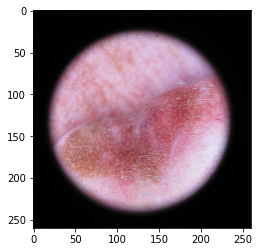

In [ ]:
for sample in dataSet_train.take(1):
  print(sample[0].shape)
  plt.imshow(sample[0][0]/255)
  plt.show()

In [ ]:
conv_base = EfficientNetB2(include_top=False,weights='imagenet',input_shape=(260,260,3))

conv_base.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 260, 260, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 260, 260, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 260, 260, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 261, 261, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [ ]:
for layer in conv_base.layers:
  layer.trainable = True
  print(layer.name,layer.trainable)

input_1 True
rescaling True
normalization True
stem_conv_pad True
stem_conv True
stem_bn True
stem_activation True
block1a_dwconv True
block1a_bn True
block1a_activation True
block1a_se_squeeze True
block1a_se_reshape True
block1a_se_reduce True
block1a_se_expand True
block1a_se_excite True
block1a_project_conv True
block1a_project_bn True
block1b_dwconv True
block1b_bn True
block1b_activation True
block1b_se_squeeze True
block1b_se_reshape True
block1b_se_reduce True
block1b_se_expand True
block1b_se_excite True
block1b_project_conv True
block1b_project_bn True
block1b_drop True
block1b_add True
block2a_expand_conv True
block2a_expand_bn True
block2a_expand_activation True
block2a_dwconv_pad True
block2a_dwconv True
block2a_bn True
block2a_activation True
block2a_se_squeeze True
block2a_se_reshape True
block2a_se_reduce True
block2a_se_expand True
block2a_se_excite True
block2a_project_conv True
block2a_project_bn True
block2b_expand_conv True
block2b_expand_bn True
block2b_expand_act

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(8, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 9, 9, 1408)        7768569   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1408)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 11272     
Total params: 7,779,841
Trainable params: 7,712,266
Non-trainable params: 67,575
_________________________________________________________________


In [ ]:
num = raiz1+raiz2+raiz3+raiz4+raiz5+raiz6+raiz7+raiz8
steps = (num*8)/32
steps = int(steps)
print(steps)

84


In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["acc"])

H = model.fit(dataSet_train,epochs=40,validation_data = dataSet_val,steps_per_epoch=steps)

Epoch 1/40
84/84 [==============================] - 180s 2s/step - loss: 0.4943 - acc: 0.8356 - val_loss: 3.0518 - val_acc: 0.5724
Epoch 2/40
84/84 [==============================] - 144s 2s/step - loss: 0.1260 - acc: 0.9613 - val_loss: 2.7505 - val_acc: 0.5638
Epoch 3/40
84/84 [==============================] - 145s 2s/step - loss: 0.1484 - acc: 0.9505 - val_loss: 3.0670 - val_acc: 0.4814
Epoch 4/40
84/84 [==============================] - 144s 2s/step - loss: 0.0923 - acc: 0.9721 - val_loss: 3.1157 - val_acc: 0.5580
Epoch 5/40
84/84 [==============================] - 145s 2s/step - loss: 0.0630 - acc: 0.9821 - val_loss: 4.3574 - val_acc: 0.4520
Epoch 6/40
84/84 [==============================] - 145s 2s/step - loss: 0.1066 - acc: 0.9695 - val_loss: 2.5444 - val_acc: 0.5176
Epoch 7/40
84/84 [==============================] - 144s 2s/step - loss: 0.0299 - acc: 0.9907 - val_loss: 2.6936 - val_acc: 0.5815
Epoch 8/40
84/84 [==============================] - 145s 2s/step - loss: 0.0530 - a

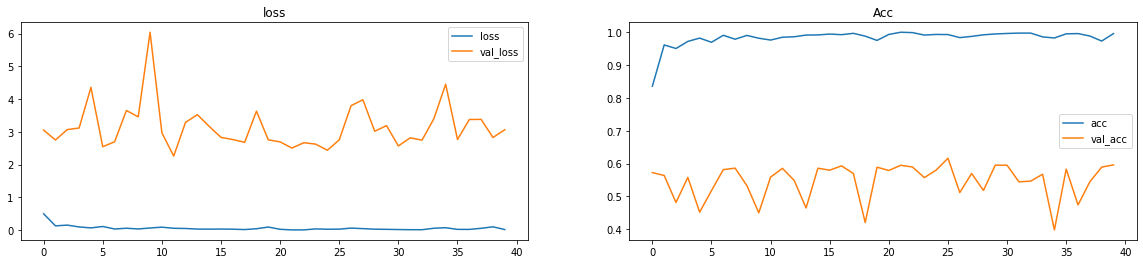

In [ ]:
def print_curva(H):
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    plt.plot(H.history['loss'], label='loss')
    plt.plot(H.history['val_loss'], label='val_loss')
    plt.legend()
    plt.title('loss')

    plt.subplot(1,2,2)
    plt.plot(H.history['acc'], label='acc')
    plt.plot(H.history['val_acc'], label='val_acc')
    plt.legend()
    plt.title('Acc')
    plt.show()

print_curva(H)

In [ ]:
labels_vet = []
for image,labels in dataSet_val:
  labels_vet = list(tf.argmax(labels,axis=1).numpy()) + labels_vet

In [ ]:
predictions = tf.math.argmax(model.predict(dataSet_val),axis=1)
onf_matrix = tf.math.confusion_matrix(labels=labels_vet,predictions=predictions)
print(onf_matrix)

tf.Tensor(
[[  99  486   86   52  149   16    8    0]
 [ 381 1217  391  217  370   22   30    0]
 [  62  412   47   20  102    7   12    0]
 [   9  123    7    7   35    1    5    0]
 [  72  239   71   34   87    1    4    0]
 [   8   20    6    1    7    0    2    0]
 [   2   20    3    3    7    0    2    0]
 [  14   65    9    5   10    1    0    0]], shape=(8, 8), dtype=int32)
